**INSTALL REQUIRED LIBRARIES**

In [1]:
!pip install kagglehub
!pip install shap lime
!pip install xgboost
!pip install nltk textblob wordcloud
!pip install scikit-learn pandas numpy matplotlib seaborn
!pip install imbalanced-learn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283840 sha256=695264279b62cce8004050a6617f098e7cdcb43c2e36b672821d15a05895d06a
  Stored in directory: c:\users\dattathreya\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   -------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\DATTATHREYA\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\DATTATHREYA\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\DATTATHREYA\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\DATTATHREYA\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DATTATHREYA\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\DATTATHREYA\anaconda3\Lib\socket.py", line 720, in readinto
    return 

**IMPORT ALL LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import zipfile
warnings.filterwarnings('ignore')

# Scikit-learn - ML Models and Utilities
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_auc_score, roc_curve, cohen_kappa_score,
                            mean_squared_error, mean_absolute_error, r2_score)

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             BaggingClassifier, AdaBoostClassifier)
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# XGBoost
import xgboost as xgb

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string

# Model Interpretability
import shap
import lime
from lime.lime_text import LimeTextExplainer
from lime.lime_tabular import LimeTabularExplainer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

# Create folder for saving images
if not os.path.exists('project_images'):
    os.makedirs('project_images')

print("All libraries imported successfully!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


All libraries imported successfully!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**DOWNLOAD DATASETS FROM KAGGLE**

In [ ]:
import kagglehub

# Dataset 1: Amazon Product Reviews (TEXT DATA) - Member 1
print("Downloading Amazon Product Reviews Dataset...")
amazon_reviews_path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
print("Path to Amazon Reviews:", amazon_reviews_path)

# Dataset 2: E-Commerce Customer Churn (STRUCTURED) - Member 2
print("\nDownloading E-Commerce Customer Churn Dataset...")
churn_path = kagglehub.dataset_download("ankitverma2010/ecommerce-customer-churn-analysis-and-prediction")
print("Path to Churn Data:", churn_path)

print("\nAll datasets downloaded successfully!")

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to Amazon Reviews: /kaggle/input/amazon-fine-food-reviews



100%|██████████| 532k/532k [00:00<00:00, 932kB/s]

Extracting files...
Path to Churn Data: /root/.cache/kagglehub/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/versions/1

All datasets downloaded successfully!


In [ ]:
 #List files in the directory
amazon_files = os.listdir(amazon_reviews_path)
print("Amazon Reviews files:", amazon_files)

# Find the CSV or SQLite file
review_file = None
for f in amazon_files:
    if f.endswith('.csv'):
        review_file = f
        break

if review_file:
    print("Loading:", review_file)
    amazon_df = pd.read_csv(f"{amazon_reviews_path}/{review_file}", on_bad_lines='skip', engine='python')
else:
    # Try SQLite if no CSV
    import sqlite3
    for f in amazon_files:
        if f.endswith('.sqlite') or f.endswith('.db'):
            conn = sqlite3.connect(f"{amazon_reviews_path}/{f}")
            amazon_df = pd.read_sql_query("SELECT * FROM Reviews", conn)
            conn.close()
            print("Loaded from SQLite database")
            break

print("\nAmazon Reviews Dataset Shape:", amazon_df.shape)
print("Columns:", amazon_df.columns.tolist())

Amazon Reviews files: ['hashes.txt', 'Reviews.csv', 'database.sqlite']
Loading: Reviews.csv

Amazon Reviews Dataset Shape: (568454, 10)
Columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


**EXPLORATORY DATA ANALYSIS (EDA)**


Dataset Shape: (568454, 10)

Column Data Types:
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

First 5 rows:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0        

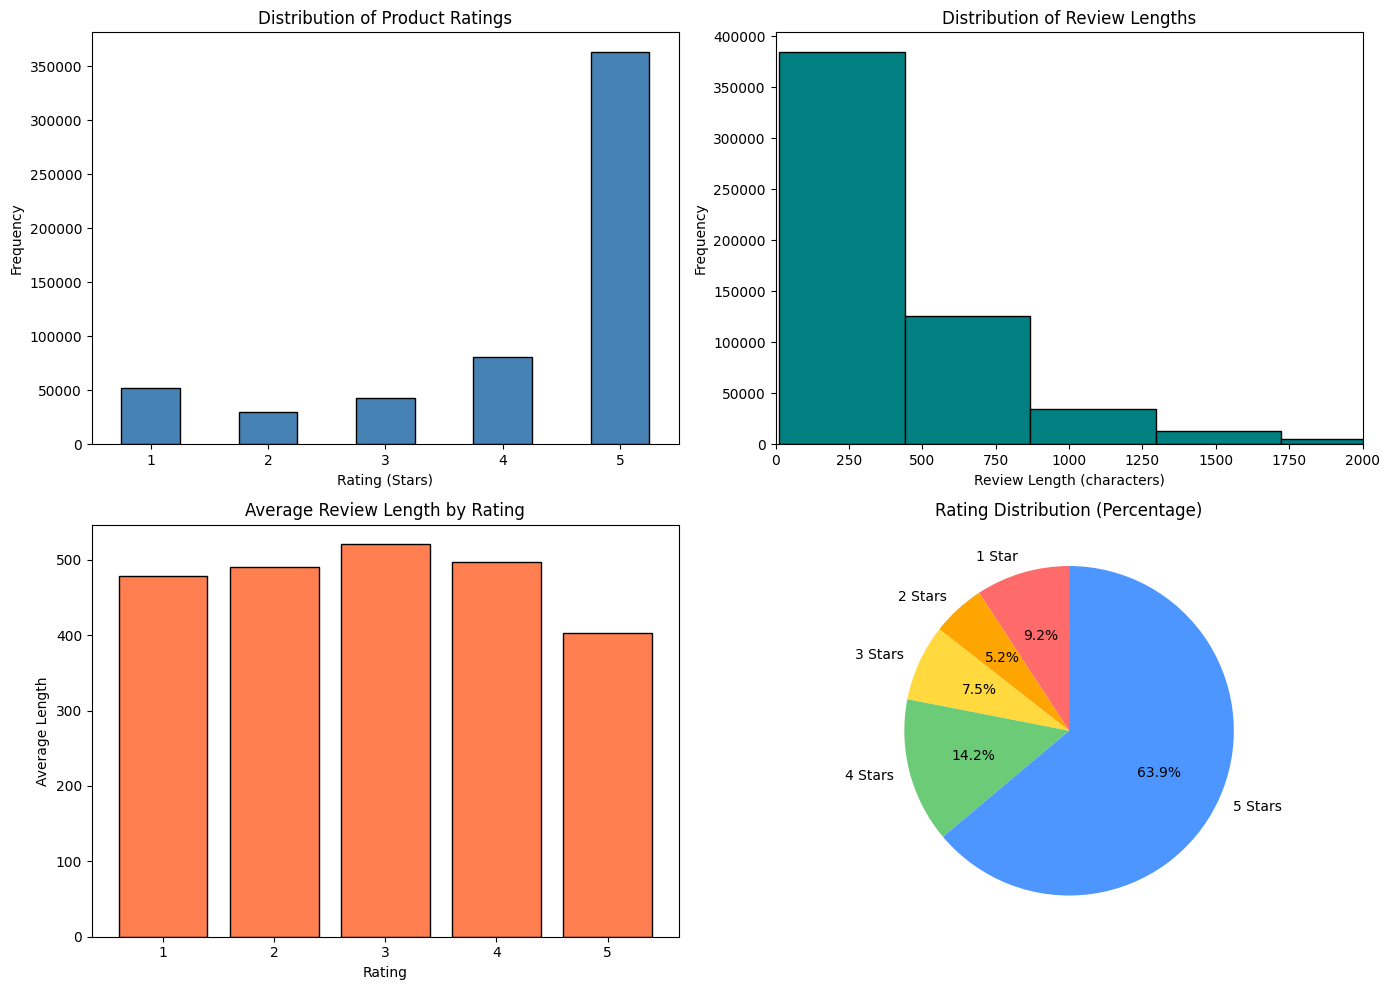

In [ ]:
# Basic info
print("\nDataset Shape:", amazon_df.shape)
print("\nColumn Data Types:")
print(amazon_df.dtypes)

print("\nFirst 5 rows:")
print(amazon_df.head())

# Check for missing values
print("\nMissing Values:")
print(amazon_df.isnull().sum())

# Identify text and rating columns
# Common column names in Amazon reviews datasets
text_col = None
rating_col = None

for col in amazon_df.columns:
    col_lower = col.lower()
    if 'text' in col_lower or 'review' in col_lower:
        if amazon_df[col].dtype == 'object':
            text_col = col
    if 'score' in col_lower or 'rating' in col_lower or 'star' in col_lower:
        rating_col = col

print("\nIdentified columns:")
print("Text column:", text_col)
print("Rating column:", rating_col)

# If columns not found, use first text and numeric columns
if text_col is None:
    for col in amazon_df.columns:
        if amazon_df[col].dtype == 'object' and amazon_df[col].str.len().mean() > 50:
            text_col = col
            break

if rating_col is None:
    for col in amazon_df.columns:
        if amazon_df[col].dtype in ['int64', 'float64']:
            if amazon_df[col].min() >= 1 and amazon_df[col].max() <= 5:
                rating_col = col
                break

print("\nFinal columns selected:")
print("Text column:", text_col)
print("Rating column:", rating_col)

# Fix data types
amazon_df[rating_col] = pd.to_numeric(amazon_df[rating_col], errors='coerce')
amazon_df = amazon_df.dropna(subset=[text_col, rating_col])
amazon_df[rating_col] = amazon_df[rating_col].astype(int)
amazon_df[text_col] = amazon_df[text_col].astype(str)

print("\nRating Distribution:")
print(amazon_df[rating_col].value_counts().sort_index())

# Create review length column
amazon_df['review_length'] = amazon_df[text_col].apply(len)

print("\nStatistical Summary:")
print(amazon_df.describe())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rating distribution
amazon_df[rating_col].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Product Ratings', fontsize=12)
axes[0, 0].set_xlabel('Rating (Stars)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xticklabels(['1', '2', '3', '4', '5'], rotation=0)

# Review length distribution
axes[0, 1].hist(amazon_df['review_length'], bins=50, edgecolor='black', color='teal')
axes[0, 1].set_title('Distribution of Review Lengths', fontsize=12)
axes[0, 1].set_xlabel('Review Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(0, 2000)

# Average review length by rating
avg_length_by_rating = amazon_df.groupby(rating_col)['review_length'].mean()
axes[1, 0].bar(avg_length_by_rating.index, avg_length_by_rating.values, color='coral', edgecolor='black')
axes[1, 0].set_title('Average Review Length by Rating', fontsize=12)
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Average Length')

# Rating percentage pie chart
rating_counts = amazon_df[rating_col].value_counts().sort_index()
colors = ['#ff6b6b', '#ffa502', '#ffd93d', '#6bcb77', '#4d96ff']
axes[1, 1].pie(rating_counts.values, labels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'],
               autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 1].set_title('Rating Distribution (Percentage)', fontsize=12)

plt.tight_layout()
plt.savefig('project_images/member1_eda.png', dpi=300, bbox_inches='tight')
plt.show()



DATA PREPROCESSING

In [ ]:
# Create a copy for preprocessing
amazon_processed = amazon_df.copy()

# Create sentiment labels from ratings
# Rating 1-2: Negative (0), 3: Neutral (1), 4-5: Positive (2)
def rating_to_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

amazon_processed['sentiment'] = amazon_processed[rating_col].apply(rating_to_sentiment)

print("\nSentiment Distribution:")
print(amazon_processed['sentiment'].value_counts())
print("0: Negative, 1: Neutral, 2: Positive")

# Text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    try:
        tokens = word_tokenize(text)
    except:
        tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove short words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)

# Sample for faster processing
print("\nSampling and preprocessing text...")
sample_size = min(50000, len(amazon_processed))
amazon_sample = amazon_processed.sample(n=sample_size, random_state=42).copy()

# Apply preprocessing
amazon_sample['cleaned_review'] = amazon_sample[text_col].apply(preprocess_text)

# Remove empty reviews
amazon_sample = amazon_sample[amazon_sample['cleaned_review'].str.len() > 0]

print("Preprocessed", len(amazon_sample), "reviews")

# Show example
print("\nExample - Original vs Cleaned:")
print("Original:", amazon_sample[text_col].iloc[0][:200], "...")
print("\nCleaned:", amazon_sample['cleaned_review'].iloc[0][:200], "...")


Sentiment Distribution:
sentiment
2    443777
0     82037
1     42640
Name: count, dtype: int64
0: Negative, 1: Neutral, 2: Positive

Sampling and preprocessing text...
Preprocessed 50000 reviews

Example - Original vs Cleaned:
Original: Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch.  They're crunchy and true to the texture of the other "real" cookies that aren't gluten-free.  S ...

Cleaned: tried couple brand glutenfree sandwich cooky best bunch theyre crunchy true texture real cooky arent glutenfree might think filling make bit sweet mean ive satisfied sweet tooth sooner chocolate versi ...


FEATURE EXTRACTION (TF-IDF)

In [ ]:
# Split data
X_text = amazon_sample['cleaned_review']
y_text = amazon_sample['sentiment']

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.25, random_state=42, stratify=y_text
)

print("Training set:", len(X_train_text), "samples")
print("Test set:", len(X_test_text), "samples")

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.95,
    stop_words='english'
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print("\nTF-IDF Matrix Shape:")
print("Training:", X_train_tfidf.shape)
print("Test:", X_test_tfidf.shape)

# Show top features
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nSample features:", list(feature_names[:20]))

print("\nTF-IDF Feature Extraction Complete!")

Training set: 37500 samples
Test set: 12500 samples

TF-IDF Matrix Shape:
Training: (37500, 5000)
Test: (12500, 5000)

Sample features: ['ability', 'able', 'able buy', 'able eat', 'able make', 'able purchase', 'absolute', 'absolute favorite', 'absolutely', 'absolutely best', 'absolutely delicious', 'absolutely love', 'absolutely loved', 'absorb', 'acai', 'acceptable', 'access', 'accident', 'accidentally', 'according']

TF-IDF Feature Extraction Complete!


MODEL 1: NAIVE BAYES CLASSIFIER


5-Fold Cross-Validation Accuracy: 0.8134 (+/- 0.0014 )

NAIVE BAYES - PERFORMANCE METRICS:
----------------------------------------
Accuracy: 0.813
Precision (weighted): 0.7508
Recall (weighted): 0.813
F1-Score (weighted): 0.754
Cohen's Kappa: 0.2403

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.25      0.38      1776
     Neutral       0.00      0.00      0.00       948
    Positive       0.81      0.99      0.89      9776

    accuracy                           0.81     12500
   macro avg       0.54      0.41      0.43     12500
weighted avg       0.75      0.81      0.75     12500



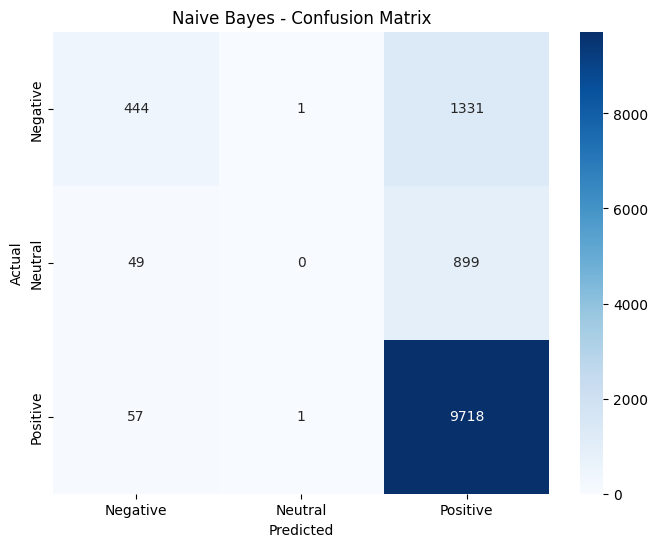

In [ ]:
# Train Multinomial Naive Bayes
nb_classifier = MultinomialNB(alpha=1.0)

# Cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X_train_tfidf, y_train_text, cv=5, scoring='accuracy')
print("\n5-Fold Cross-Validation Accuracy:", round(cv_scores_nb.mean(), 4),
      "(+/-", round(cv_scores_nb.std()*2, 4), ")")

# Train on full training set
nb_classifier.fit(X_train_tfidf, y_train_text)

# Predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)
y_pred_proba_nb = nb_classifier.predict_proba(X_test_tfidf)

# Evaluation Metrics
print("\nNAIVE BAYES - PERFORMANCE METRICS:")
print("-" * 40)
print("Accuracy:", round(accuracy_score(y_test_text, y_pred_nb), 4))
print("Precision (weighted):", round(precision_score(y_test_text, y_pred_nb, average='weighted'), 4))
print("Recall (weighted):", round(recall_score(y_test_text, y_pred_nb, average='weighted'), 4))
print("F1-Score (weighted):", round(f1_score(y_test_text, y_pred_nb, average='weighted'), 4))
print("Cohen's Kappa:", round(cohen_kappa_score(y_test_text, y_pred_nb), 4))

print("\nClassification Report:")
print(classification_report(y_test_text, y_pred_nb, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test_text, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('project_images/member1_nb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Store results
member1_results = {
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test_text, y_pred_nb),
        'Precision': precision_score(y_test_text, y_pred_nb, average='weighted'),
        'Recall': recall_score(y_test_text, y_pred_nb, average='weighted'),
        'F1-Score': f1_score(y_test_text, y_pred_nb, average='weighted'),
        'Cohen_Kappa': cohen_kappa_score(y_test_text, y_pred_nb)
    }
}

In [ ]:
#SUPPORT VECTOR MACHINE (SVM) - MOdel 2


5-Fold Cross-Validation Accuracy: 0.8467 (+/- 0.0052 )

SVM - PERFORMANCE METRICS:
----------------------------------------
Accuracy: 0.8456
Precision (weighted): 0.8174
Recall (weighted): 0.8456
F1-Score (weighted): 0.8242
Cohen's Kappa: 0.5106

Classification Report:
              precision    recall  f1-score   support

    Negative       0.68      0.61      0.64      1776
     Neutral       0.41      0.12      0.19       948
    Positive       0.88      0.96      0.92      9776

    accuracy                           0.85     12500
   macro avg       0.66      0.56      0.58     12500
weighted avg       0.82      0.85      0.82     12500



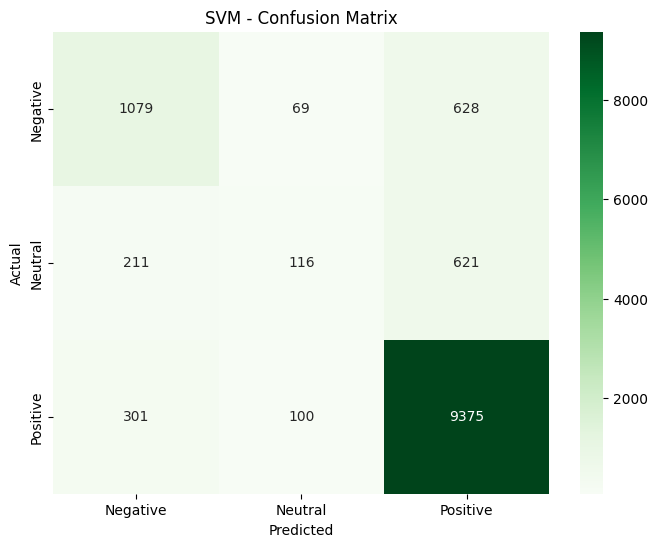

In [ ]:
# Train SVM with Linear kernel
svm_classifier = LinearSVC(C=1.0, max_iter=2000, random_state=42)

# Cross-validation
cv_scores_svm = cross_val_score(svm_classifier, X_train_tfidf, y_train_text, cv=5, scoring='accuracy')
print("\n5-Fold Cross-Validation Accuracy:", round(cv_scores_svm.mean(), 4),
      "(+/-", round(cv_scores_svm.std()*2, 4), ")")

# Train on full training set
svm_classifier.fit(X_train_tfidf, y_train_text)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluation Metrics
print("\nSVM - PERFORMANCE METRICS:")
print("-" * 40)
print("Accuracy:", round(accuracy_score(y_test_text, y_pred_svm), 4))
print("Precision (weighted):", round(precision_score(y_test_text, y_pred_svm, average='weighted'), 4))
print("Recall (weighted):", round(recall_score(y_test_text, y_pred_svm, average='weighted'), 4))
print("F1-Score (weighted):", round(f1_score(y_test_text, y_pred_svm, average='weighted'), 4))
print("Cohen's Kappa:", round(cohen_kappa_score(y_test_text, y_pred_svm), 4))

print("\nClassification Report:")
print(classification_report(y_test_text, y_pred_svm, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test_text, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('project_images/member1_svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Store results
member1_results['SVM'] = {
    'Accuracy': accuracy_score(y_test_text, y_pred_svm),
    'Precision': precision_score(y_test_text, y_pred_svm, average='weighted'),
    'Recall': recall_score(y_test_text, y_pred_svm, average='weighted'),
    'F1-Score': f1_score(y_test_text, y_pred_svm, average='weighted'),
    'Cohen_Kappa': cohen_kappa_score(y_test_text, y_pred_svm)
}

MODEL INTERPRETABILITY (LIME)


LIME Explanations for Sample Reviews:
--------------------------------------------------

Review 0 :
Text: product really taste like plastic raisin deeply disappointed recommend product anyone ...
True Label: Negative
Predicted: Positive

Top features influencing prediction:
  ' recommend ': -0.0555 -> Negative
  ' really ': 0.0266 -> Positive
  ' disappointed ': 0.0208 -> Positive
  ' product ': -0.0191 -> Negative
  ' taste ': 0.0133 -> Positive

Review 50 :
Text: buying ever yuck yuck yuck might well roasted straw ...
True Label: Negative
Predicted: Negative

Top features influencing prediction:
  ' straw ': 0.0454 -> Positive
  ' yuck ': -0.0378 -> Negative
  ' buying ': -0.008 -> Negative
  ' roasted ': -0.0042 -> Negative
  ' well ': 0.0031 -> Positive

Review 100 :
Text: new raising kitten tried variety canned food recent month although kitten readily took fancy feast brand healthy food biggest concern byproduct conten ...
True Label: Positive
Predicted: Positive

Top features 

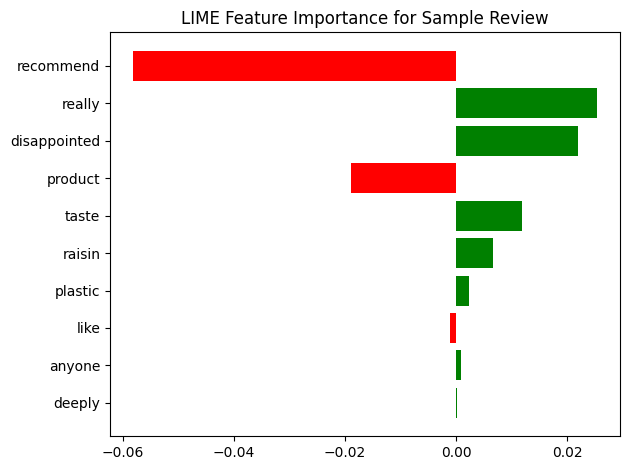

LIME explanation saved!

Member 1 LIME Interpretability Complete!


In [ ]:
# Create LIME explainer for text
class_names = ['Negative', 'Neutral', 'Positive']

# Create a pipeline function for LIME
def predict_proba_pipeline(texts):
    tfidf_texts = tfidf_vectorizer.transform(texts)
    return nb_classifier.predict_proba(tfidf_texts)

# Initialize LIME Text Explainer
lime_explainer = LimeTextExplainer(class_names=class_names, random_state=42)

# Explain sample predictions
print("\nLIME Explanations for Sample Reviews:")
print("-" * 50)

# Get sample indices
sample_indices = [0, 50, 100]

for idx in sample_indices[:3]:
    if idx < len(X_test_text):
        review_text = X_test_text.iloc[idx]
        true_label = y_test_text.iloc[idx]
        predicted_label = y_pred_nb[idx]

        print("\nReview", idx, ":")
        print("Text:", review_text[:150], "...")
        print("True Label:", class_names[true_label])
        print("Predicted:", class_names[predicted_label])

        # Generate LIME explanation
        try:
            exp = lime_explainer.explain_instance(
                review_text,
                predict_proba_pipeline,
                num_features=10,
                num_samples=500
            )

            print("\nTop features influencing prediction:")
            for feature, weight in exp.as_list()[:5]:
                direction = "-> Positive" if weight > 0 else "-> Negative"
                print("  '", feature, "':", round(weight, 4), direction)
        except Exception as e:
            print("Could not generate LIME explanation:", str(e))

# Generate and save LIME visualization
print("\nGenerating LIME visualization...")
try:
    exp = lime_explainer.explain_instance(
        X_test_text.iloc[0],
        predict_proba_pipeline,
        num_features=10
    )

    fig = exp.as_pyplot_figure()
    plt.title('LIME Feature Importance for Sample Review')
    plt.tight_layout()
    plt.savefig('project_images/member1_lime_features.png', dpi=300, bbox_inches='tight')
    plt.show()

    exp.save_to_file('project_images/member1_lime_explanation.html')
    print("LIME explanation saved!")
except Exception as e:
    print("Error generating LIME visualization:", str(e))

print("\nMember 1 LIME Interpretability Complete!")

MODEL COMPARISON


Model Performance Comparison:
             Accuracy  Precision   Recall  F1-Score  Cohen_Kappa
Naive Bayes   0.81296   0.750808  0.81296  0.753952     0.240271
SVM           0.84560   0.817361  0.84560  0.824156     0.510589


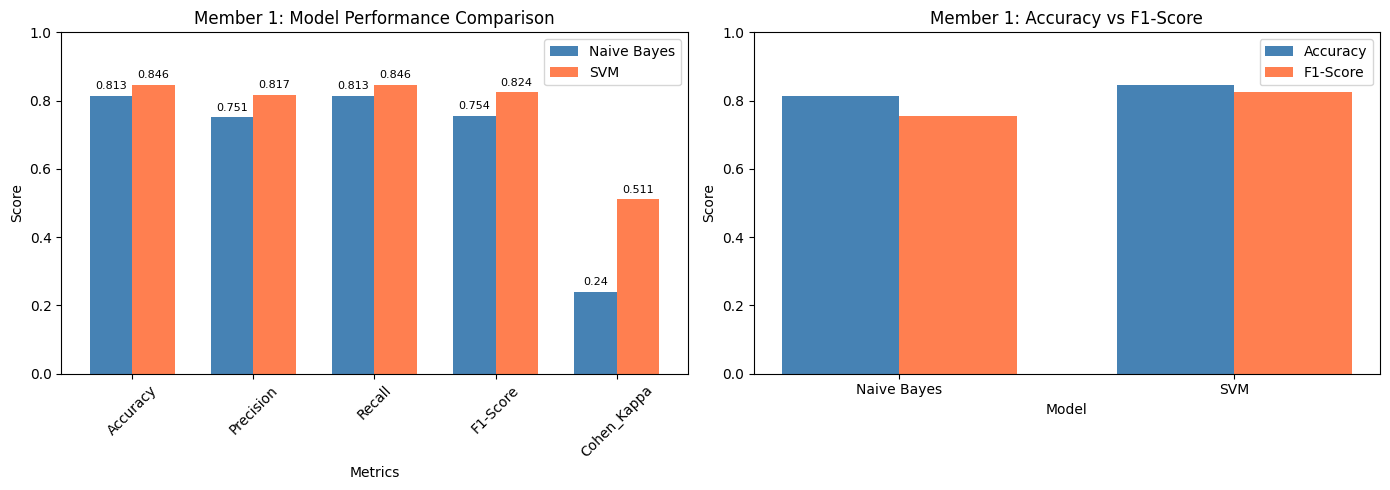

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame(member1_results).T
print("\nModel Performance Comparison:")
print(comparison_df)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cohen_Kappa']
x = np.arange(len(metrics))
width = 0.35

nb_scores = [member1_results['Naive Bayes'][m] for m in metrics]
svm_scores = [member1_results['SVM'][m] for m in metrics]

axes[0].bar(x - width/2, nb_scores, width, label='Naive Bayes', color='steelblue')
axes[0].bar(x + width/2, svm_scores, width, label='SVM', color='coral')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Member 1: Model Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45)
axes[0].legend()
axes[0].set_ylim(0, 1)

# Add value labels
for i, (nb_val, svm_val) in enumerate(zip(nb_scores, svm_scores)):
    axes[0].text(i - width/2, nb_val + 0.02, str(round(nb_val, 3)), ha='center', fontsize=8)
    axes[0].text(i + width/2, svm_val + 0.02, str(round(svm_val, 3)), ha='center', fontsize=8)

# Accuracy vs F1 comparison
model_names = ['Naive Bayes', 'SVM']
accuracies = [member1_results['Naive Bayes']['Accuracy'], member1_results['SVM']['Accuracy']]
f1_scores_list = [member1_results['Naive Bayes']['F1-Score'], member1_results['SVM']['F1-Score']]

x_pos = np.arange(len(model_names))
axes[1].bar(x_pos - width/2, accuracies, width, label='Accuracy', color='steelblue')
axes[1].bar(x_pos + width/2, f1_scores_list, width, label='F1-Score', color='coral')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].set_title('Member 1: Accuracy vs F1-Score')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names)
axes[1].legend()
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('project_images/member1_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Save results to CSV
comparison_df.to_csv('project_images/member1_results.csv')

LOAD E-COMMERCE CHURN DATASET

In [ ]:
# List all files in churn directory and subdirectories
print("Searching for CSV files...")

def find_csv_files(path):
    csv_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

csv_files_found = find_csv_files(churn_path)
print("CSV files found:", csv_files_found)

# If no CSV found, try downloading a different churn dataset
if len(csv_files_found) == 0:
    print("\nNo CSV found in downloaded path. Trying alternative dataset...")

    # Try alternative churn dataset
    try:
        churn_path = kagglehub.dataset_download("blastchar/telco-customer-churn")
        csv_files_found = find_csv_files(churn_path)
        print("Alternative CSV files found:", csv_files_found)
    except:
        pass

# If still no CSV, try another alternative
if len(csv_files_found) == 0:
    print("\nTrying second alternative dataset...")
    try:
        churn_path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")
        csv_files_found = find_csv_files(churn_path)
        print("Second alternative CSV files found:", csv_files_found)
    except:
        pass

# Load the first CSV file found
if len(csv_files_found) > 0:
    churn_file_path = csv_files_found[0]
    print("\nLoading:", churn_file_path)
    churn_df = pd.read_csv(churn_file_path)
else:
    # Last resort - create sample data or use URL
    print("\nDownloading from direct URL...")
    url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
    churn_df = pd.read_csv(url)

print("\nE-Commerce Churn Dataset Shape:", churn_df.shape)
print("Columns:", churn_df.columns.tolist())

Searching for CSV files...
CSV files found: []

No CSV found in downloaded path. Trying alternative dataset...
Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Alternative CSV files found: ['/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv']

Loading: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv

E-Commerce Churn Dataset Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


EXPLORATORY DATA ANALYSIS (EDA)

Churn dataset files: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']
Loading: WA_Fn-UseC_-Telco-Customer-Churn.csv

E-Commerce Churn Dataset Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

MEMBER 2: EXPLORATORY DATA ANALYSIS

Dataset Info:
Shape: (7043, 21)

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract    

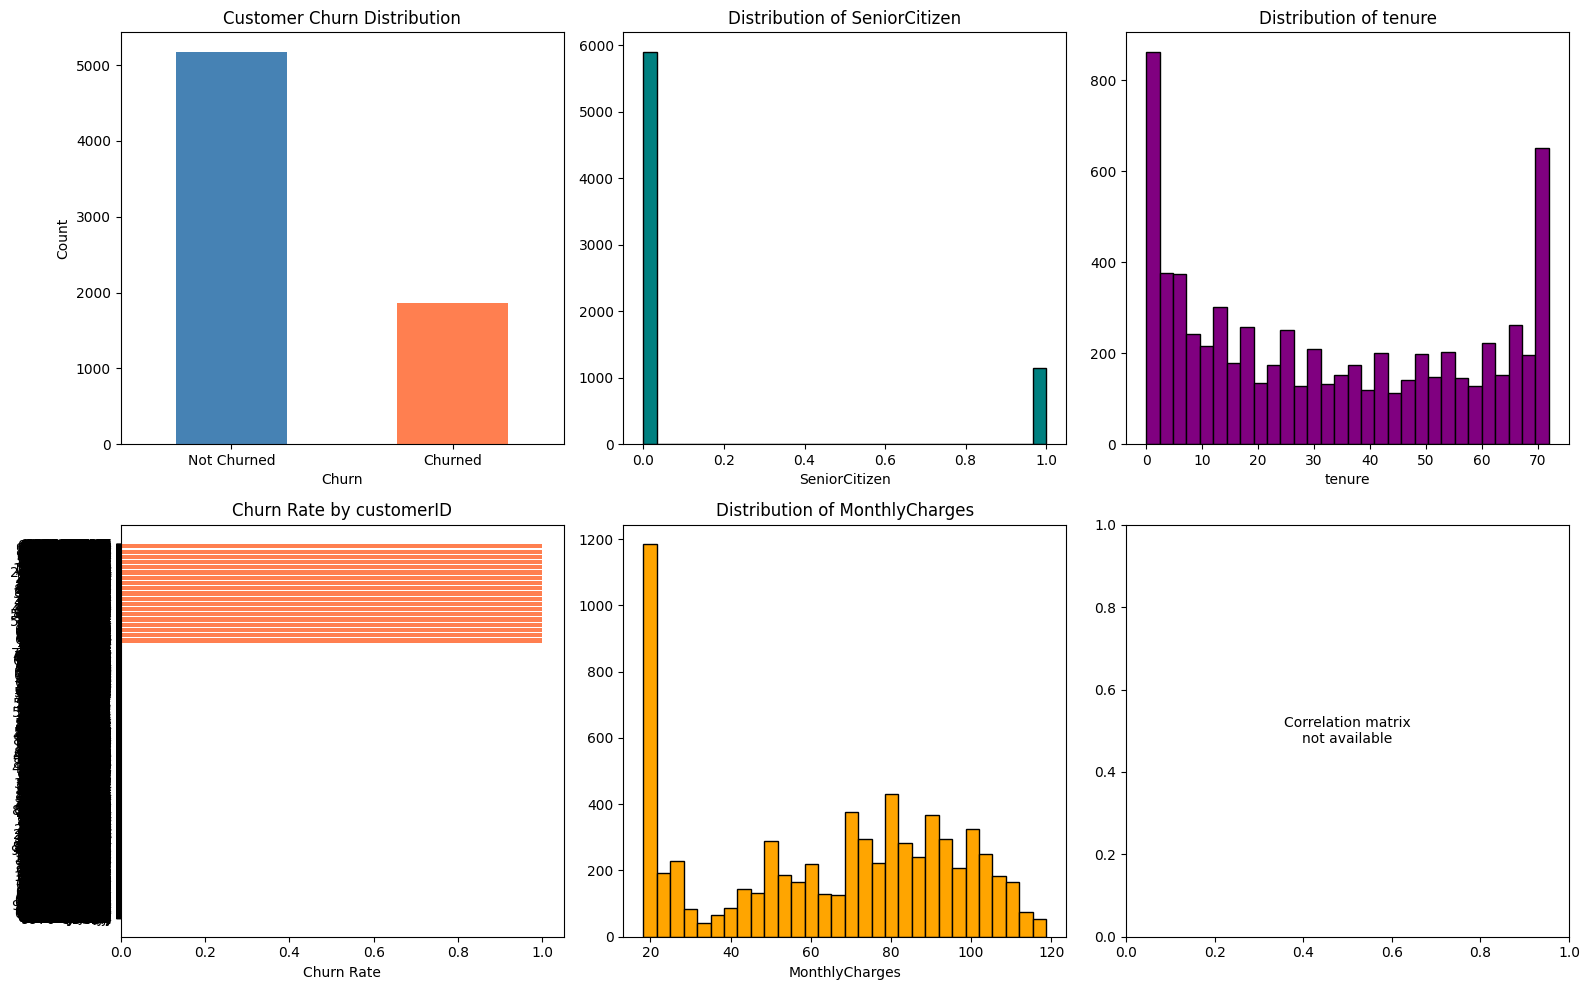

In [ ]:

# List files in churn directory
churn_files = os.listdir(churn_path)
print("Churn dataset files:", churn_files)

# Find the CSV file
churn_file = None
for f in churn_files:
    if f.endswith('.csv'):
        churn_file = f
        break

print("Loading:", churn_file)

# Load the dataset
churn_df = pd.read_csv(f"{churn_path}/{churn_file}")

print("\nE-Commerce Churn Dataset Shape:", churn_df.shape)
print("Columns:", churn_df.columns.tolist())

# =============================================================================
# CELL 13: MEMBER 2 - EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

print("\n" + "=" * 60)
print("MEMBER 2: EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Basic info
print("\nDataset Info:")
print("Shape:", churn_df.shape)
print("\nData Types:")
print(churn_df.dtypes)

print("\nFirst 5 rows:")
print(churn_df.head())

print("\nStatistical Summary:")
print(churn_df.describe())

# Check for missing values
print("\nMissing Values:")
print(churn_df.isnull().sum())

# Identify target column (Churn)
target_col = None
for col in churn_df.columns:
    col_lower = col.lower()
    if 'churn' in col_lower:
        target_col = col
        break

if target_col is None:
    # Use last column or column with binary values
    for col in churn_df.columns:
        if churn_df[col].nunique() == 2:
            target_col = col
            break

print("\nTarget column identified:", target_col)

# Convert target to numeric if it contains Yes/No or similar strings
print("\nOriginal target values:", churn_df[target_col].unique())

# Convert Yes/No to 1/0
if churn_df[target_col].dtype == 'object':
    churn_df[target_col] = churn_df[target_col].map({
        'Yes': 1, 'No': 0,
        'yes': 1, 'no': 0,
        'YES': 1, 'NO': 0,
        'True': 1, 'False': 0,
        'true': 1, 'false': 0,
        '1': 1, '0': 0,
        1: 1, 0: 0
    })
    # If still has NaN, try to convert remaining values
    if churn_df[target_col].isnull().any():
        churn_df[target_col] = pd.to_numeric(churn_df[target_col], errors='coerce')
        churn_df = churn_df.dropna(subset=[target_col])

    churn_df[target_col] = churn_df[target_col].astype(int)

print("Converted target values:", churn_df[target_col].unique())

# Target variable distribution
print("\nTarget Variable Distribution:")
print(churn_df[target_col].value_counts())
print("\nClass balance:", churn_df[target_col].value_counts(normalize=True).round(3).to_dict())

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Target distribution
churn_df[target_col].value_counts().plot(kind='bar', ax=axes[0, 0], color=['steelblue', 'coral'])
axes[0, 0].set_title('Customer Churn Distribution')
axes[0, 0].set_xticklabels(['Not Churned', 'Churned'], rotation=0)
axes[0, 0].set_ylabel('Count')

# Find numeric columns for visualization
numeric_cols = churn_df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Plot distributions of key numeric features
if len(numeric_cols) >= 1:
    axes[0, 1].hist(churn_df[numeric_cols[0]].dropna(), bins=30, edgecolor='black', color='teal')
    axes[0, 1].set_title(f'Distribution of {numeric_cols[0]}')
    axes[0, 1].set_xlabel(numeric_cols[0])

if len(numeric_cols) >= 2:
    axes[0, 2].hist(churn_df[numeric_cols[1]].dropna(), bins=30, edgecolor='black', color='purple')
    axes[0, 2].set_title(f'Distribution of {numeric_cols[1]}')
    axes[0, 2].set_xlabel(numeric_cols[1])

# Churn by categorical features
categorical_cols = churn_df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) >= 1 and target_col not in categorical_cols:
    # Calculate churn rate by category
    try:
        churn_by_cat = churn_df.groupby(categorical_cols[0])[target_col].mean().sort_values()
        axes[1, 0].barh(range(len(churn_by_cat)), churn_by_cat.values, color='coral')
        axes[1, 0].set_yticks(range(len(churn_by_cat)))
        axes[1, 0].set_yticklabels([str(x)[:15] for x in churn_by_cat.index])
        axes[1, 0].set_title(f'Churn Rate by {categorical_cols[0]}')
        axes[1, 0].set_xlabel('Churn Rate')
    except:
        # If groupby fails, show target distribution instead
        churn_df[target_col].value_counts().plot(kind='bar', ax=axes[1, 0], color='coral')
        axes[1, 0].set_title('Churn Distribution')
else:
    # Show target distribution
    churn_df[target_col].value_counts().plot(kind='bar', ax=axes[1, 0], color='coral')
    axes[1, 0].set_title('Churn Distribution')

if len(numeric_cols) >= 3:
    axes[1, 1].hist(churn_df[numeric_cols[2]].dropna(), bins=30, edgecolor='black', color='orange')
    axes[1, 1].set_title(f'Distribution of {numeric_cols[2]}')
    axes[1, 1].set_xlabel(numeric_cols[2])

# Correlation heatmap for numeric features
if len(numeric_cols) >= 4:
    corr_cols = numeric_cols[:8] + [target_col] if target_col in churn_df.select_dtypes(include=[np.number]).columns else numeric_cols[:8]
    corr_matrix = churn_df[corr_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2], fmt='.2f', annot_kws={'size': 8})
    axes[1, 2].set_title('Feature Correlation Matrix')
else:
    axes[1, 2].text(0.5, 0.5, 'Correlation matrix\nnot available', ha='center', va='center')

plt.tight_layout()
plt.savefig('project_images/member2_eda.png', dpi=300, bbox_inches='tight')
plt.show()

DATA PREPROCESSING

In [ ]:
# Create a copy for preprocessing
churn_processed = churn_df.copy()

print("Original shape:", churn_processed.shape)

# Handle missing values
print("\nHandling missing values...")
for col in churn_processed.columns:
    if churn_processed[col].isnull().sum() > 0:
        if churn_processed[col].dtype in ['int64', 'float64']:
            # Fill numeric with median
            churn_processed[col].fillna(churn_processed[col].median(), inplace=True)
        else:
            # Fill categorical with mode
            churn_processed[col].fillna(churn_processed[col].mode()[0], inplace=True)

print("Missing values after handling:", churn_processed.isnull().sum().sum())

# Encode categorical variables
print("\nEncoding categorical variables...")
label_encoders = {}
categorical_cols = churn_processed.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    churn_processed[col] = le.fit_transform(churn_processed[col].astype(str))
    label_encoders[col] = le
    print(f"  Encoded: {col}")

# Prepare features and target
# Remove ID columns if present
id_cols = [col for col in churn_processed.columns if 'id' in col.lower() or 'customerid' in col.lower()]
feature_cols = [col for col in churn_processed.columns if col != target_col and col not in id_cols]

X_churn = churn_processed[feature_cols]
y_churn = churn_processed[target_col]

# Ensure target is numeric
y_churn = pd.to_numeric(y_churn, errors='coerce').fillna(0).astype(int)

print("\nFeature columns:", feature_cols)
print("\nFeature matrix shape:", X_churn.shape)
print("Target shape:", y_churn.shape)

# Split data
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X_churn, y_churn, test_size=0.25, random_state=42, stratify=y_churn
)

print("\nTraining set:", X_train_churn.shape)
print("Test set:", X_test_churn.shape)

# Scale features
scaler_churn = StandardScaler()
X_train_churn_scaled = scaler_churn.fit_transform(X_train_churn)
X_test_churn_scaled = scaler_churn.transform(X_test_churn)

# Check class imbalance
class_counts = y_train_churn.value_counts()
print("\nTraining class distribution:")
print(class_counts)

# Apply SMOTE if imbalanced
if class_counts.min() / class_counts.max() < 0.5:
    print("\nApplying SMOTE to handle class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_churn_balanced, y_train_churn_balanced = smote.fit_resample(X_train_churn_scaled, y_train_churn)
    print("After SMOTE:", pd.Series(y_train_churn_balanced).value_counts().to_dict())
else:
    X_train_churn_balanced = X_train_churn_scaled
    y_train_churn_balanced = y_train_churn

Original shape: (7043, 21)

Handling missing values...
Missing values after handling: 0

Encoding categorical variables...
  Encoded: customerID
  Encoded: gender
  Encoded: Partner
  Encoded: Dependents
  Encoded: PhoneService
  Encoded: MultipleLines
  Encoded: InternetService
  Encoded: OnlineSecurity
  Encoded: OnlineBackup
  Encoded: DeviceProtection
  Encoded: TechSupport
  Encoded: StreamingTV
  Encoded: StreamingMovies
  Encoded: Contract
  Encoded: PaperlessBilling
  Encoded: PaymentMethod
  Encoded: TotalCharges

Feature columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Feature matrix shape: (7043, 19)
Target shape: (7043,)

Training set: (5282, 19)
Test set: (1761, 19)

Training class distribution:
Churn
0    3880
1   

RANDOM FOREST CLASSIFIER


Running 5-fold cross-validation...
5-Fold CV Accuracy: 0.8372 (+/- 0.0623 )

RANDOM FOREST - PERFORMANCE METRICS:
----------------------------------------
Accuracy: 0.7717
Precision: 0.5554
Recall (Sensitivity): 0.6981
Specificity: 0.7983
F1-Score: 0.6186
Cohen's Kappa: 0.4587
ROC-AUC: 0.8356

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.88      0.80      0.84      1294
     Churned       0.56      0.70      0.62       467

    accuracy                           0.77      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.79      0.77      0.78      1761



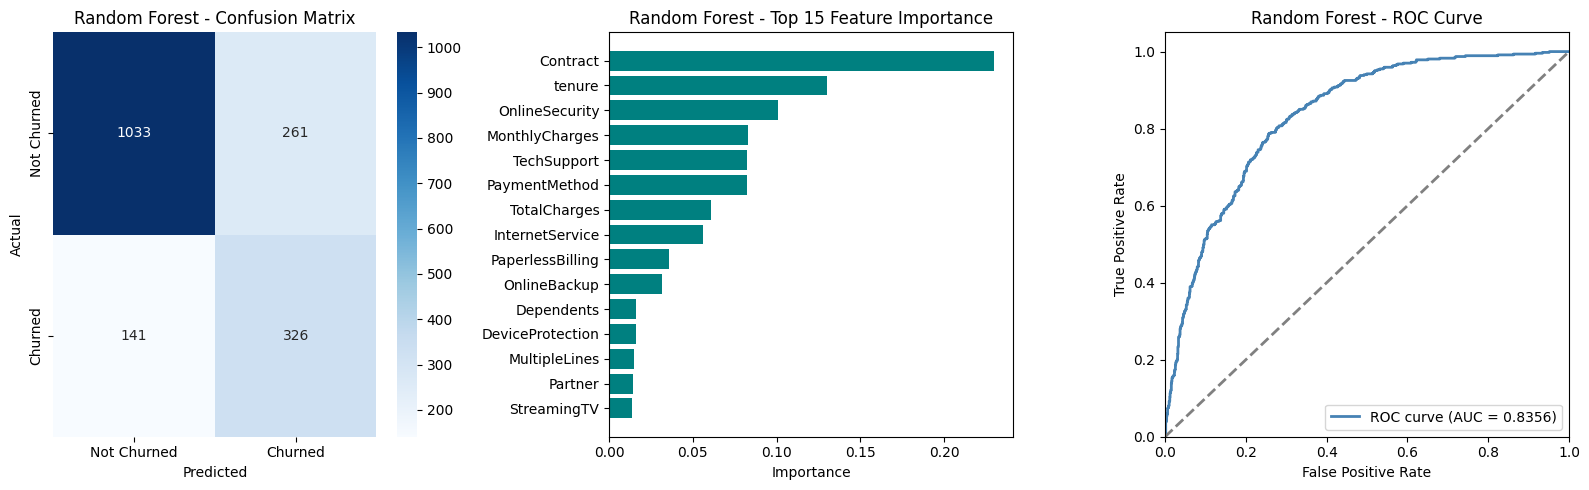

In [ ]:
# Initialize Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Cross-validation
print("\nRunning 5-fold cross-validation...")
cv_scores_rf = cross_val_score(rf_classifier, X_train_churn_balanced, y_train_churn_balanced, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy:", round(cv_scores_rf.mean(), 4), "(+/-", round(cv_scores_rf.std()*2, 4), ")")

# Train model
rf_classifier.fit(X_train_churn_balanced, y_train_churn_balanced)

# Predictions on original test set
y_pred_rf = rf_classifier.predict(X_test_churn_scaled)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_churn_scaled)[:, 1]

# Evaluation Metrics
print("\nRANDOM FOREST - PERFORMANCE METRICS:")
print("-" * 40)
print("Accuracy:", round(accuracy_score(y_test_churn, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test_churn, y_pred_rf), 4))
print("Recall (Sensitivity):", round(recall_score(y_test_churn, y_pred_rf), 4))
print("Specificity:", round(recall_score(y_test_churn, y_pred_rf, pos_label=0), 4))
print("F1-Score:", round(f1_score(y_test_churn, y_pred_rf), 4))
print("Cohen's Kappa:", round(cohen_kappa_score(y_test_churn, y_pred_rf), 4))
print("ROC-AUC:", round(roc_auc_score(y_test_churn, y_pred_proba_rf), 4))

print("\nClassification Report:")
print(classification_report(y_test_churn, y_pred_rf, target_names=['Not Churned', 'Churned']))

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_churn, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
axes[0].set_title('Random Forest - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=True).tail(15)

axes[1].barh(feature_importance['feature'], feature_importance['importance'], color='teal')
axes[1].set_title('Random Forest - Top 15 Feature Importance')
axes[1].set_xlabel('Importance')

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_churn, y_pred_proba_rf)
axes[2].plot(fpr_rf, tpr_rf, color='steelblue', lw=2,
             label='ROC curve (AUC = ' + str(round(roc_auc_score(y_test_churn, y_pred_proba_rf), 4)) + ')')
axes[2].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Random Forest - ROC Curve')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.savefig('project_images/member2_rf_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Store results
member2_results = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test_churn, y_pred_rf),
        'Precision': precision_score(y_test_churn, y_pred_rf),
        'Recall': recall_score(y_test_churn, y_pred_rf),
        'Specificity': recall_score(y_test_churn, y_pred_rf, pos_label=0),
        'F1-Score': f1_score(y_test_churn, y_pred_rf),
        'Cohen_Kappa': cohen_kappa_score(y_test_churn, y_pred_rf),
        'ROC_AUC': roc_auc_score(y_test_churn, y_pred_proba_rf)
    }
}


MODEL 2: XGBOOST CLASSIFIER


Running 5-fold cross-validation...
5-Fold CV Accuracy: 0.8429 (+/- 0.1259 )

XGBOOST - PERFORMANCE METRICS:
----------------------------------------
Accuracy: 0.7774
Precision: 0.5758
Recall (Sensitivity): 0.6103
Specificity: 0.8377
F1-Score: 0.5925
Cohen's Kappa: 0.4396
ROC-AUC: 0.836

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.86      0.84      0.85      1294
     Churned       0.58      0.61      0.59       467

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761



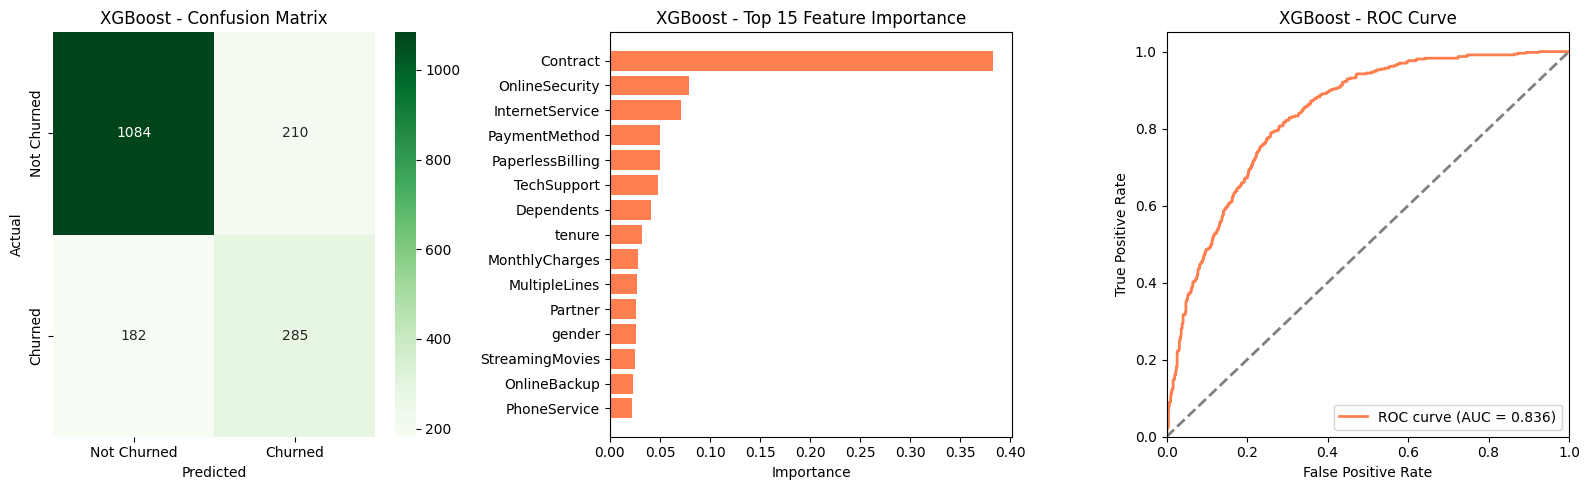

In [ ]:
# Initialize XGBoost
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Cross-validation
print("\nRunning 5-fold cross-validation...")
cv_scores_xgb = cross_val_score(xgb_classifier, X_train_churn_balanced, y_train_churn_balanced, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy:", round(cv_scores_xgb.mean(), 4), "(+/-", round(cv_scores_xgb.std()*2, 4), ")")

# Train model
xgb_classifier.fit(X_train_churn_balanced, y_train_churn_balanced)

# Predictions
y_pred_xgb = xgb_classifier.predict(X_test_churn_scaled)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_churn_scaled)[:, 1]

# Evaluation Metrics
print("\nXGBOOST - PERFORMANCE METRICS:")
print("-" * 40)
print("Accuracy:", round(accuracy_score(y_test_churn, y_pred_xgb), 4))
print("Precision:", round(precision_score(y_test_churn, y_pred_xgb), 4))
print("Recall (Sensitivity):", round(recall_score(y_test_churn, y_pred_xgb), 4))
print("Specificity:", round(recall_score(y_test_churn, y_pred_xgb, pos_label=0), 4))
print("F1-Score:", round(f1_score(y_test_churn, y_pred_xgb), 4))
print("Cohen's Kappa:", round(cohen_kappa_score(y_test_churn, y_pred_xgb), 4))
print("ROC-AUC:", round(roc_auc_score(y_test_churn, y_pred_proba_xgb), 4))

print("\nClassification Report:")
print(classification_report(y_test_churn, y_pred_xgb, target_names=['Not Churned', 'Churned']))

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_churn, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
axes[0].set_title('XGBoost - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Feature Importance
xgb_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_classifier.feature_importances_
}).sort_values('importance', ascending=True).tail(15)

axes[1].barh(xgb_importance['feature'], xgb_importance['importance'], color='coral')
axes[1].set_title('XGBoost - Top 15 Feature Importance')
axes[1].set_xlabel('Importance')

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_churn, y_pred_proba_xgb)
axes[2].plot(fpr_xgb, tpr_xgb, color='coral', lw=2,
             label='ROC curve (AUC = ' + str(round(roc_auc_score(y_test_churn, y_pred_proba_xgb), 4)) + ')')
axes[2].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('XGBoost - ROC Curve')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.savefig('project_images/member2_xgb_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Store results
member2_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test_churn, y_pred_xgb),
    'Precision': precision_score(y_test_churn, y_pred_xgb),
    'Recall': recall_score(y_test_churn, y_pred_xgb),
    'Specificity': recall_score(y_test_churn, y_pred_xgb, pos_label=0),
    'F1-Score': f1_score(y_test_churn, y_pred_xgb),
    'Cohen_Kappa': cohen_kappa_score(y_test_churn, y_pred_xgb),
    'ROC_AUC': roc_auc_score(y_test_churn, y_pred_proba_xgb)
}


MODEL INTERPRETABILITY (SHAP)


Generating SHAP Summary Plot...


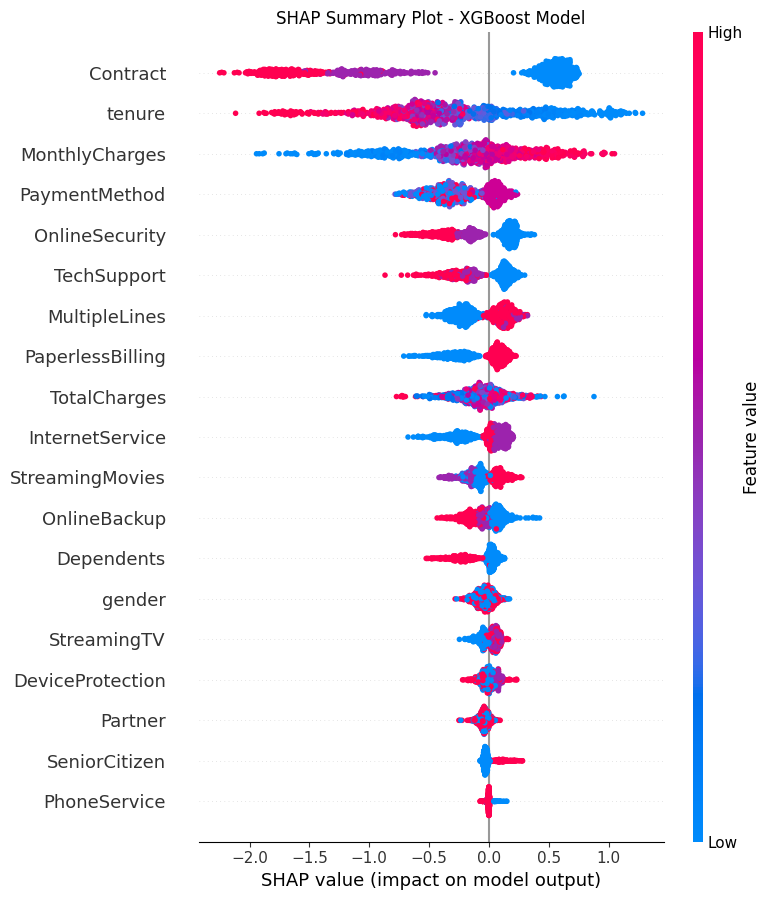


Generating SHAP Feature Importance Bar Plot...


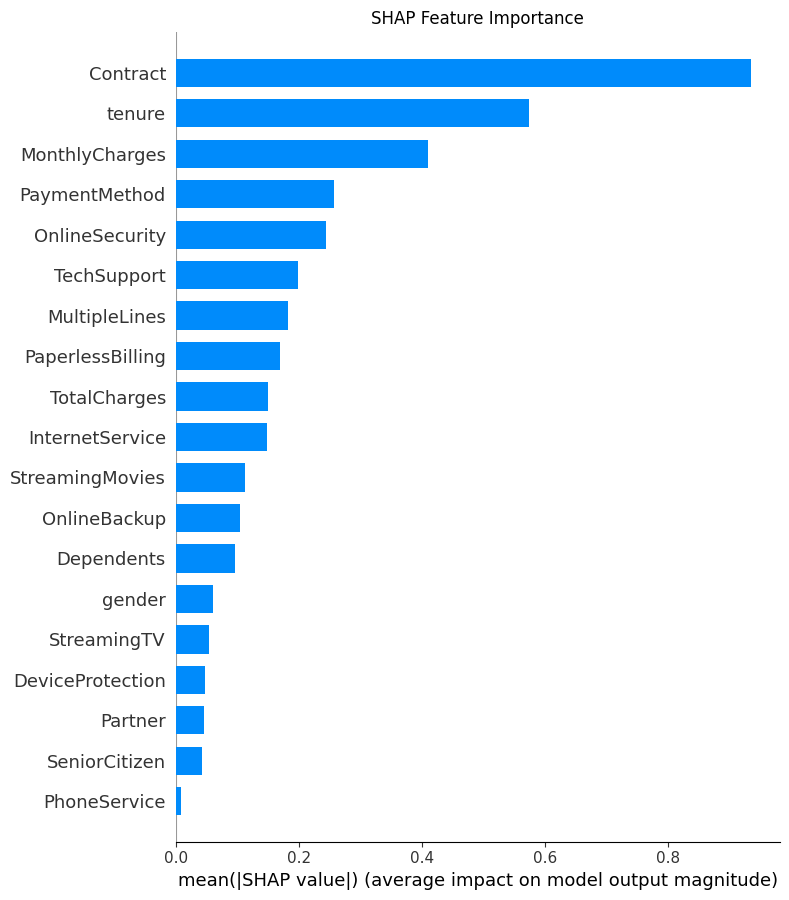


SHAP Interpretation for Sample Prediction:
--------------------------------------------------
Sample 0 :
True Label: Not Churned
Predicted: Not Churned
Prediction Probability: 0.0713

Top 5 features influencing this prediction:
   Contract : -1.2304 -> decreases churn risk
   tenure : -0.8227 -> decreases churn risk
   PaymentMethod : -0.4353 -> decreases churn risk
   OnlineSecurity : 0.2777 -> increases churn risk
   StreamingMovies : -0.2033 -> decreases churn risk


In [ ]:
# Use a sample for SHAP calculations
shap_sample_size = min(1000, len(X_test_churn_scaled))
X_shap_sample = X_test_churn_scaled[:shap_sample_size]

# Create SHAP explainer
explainer_shap = shap.TreeExplainer(xgb_classifier)
shap_values = explainer_shap.shap_values(X_shap_sample)

# SHAP Summary Plot
print("\nGenerating SHAP Summary Plot...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_shap_sample, feature_names=feature_cols, show=False)
plt.title('SHAP Summary Plot - XGBoost Model')
plt.tight_layout()
plt.savefig('project_images/member2_shap_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP Bar Plot
print("\nGenerating SHAP Feature Importance Bar Plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_shap_sample, feature_names=feature_cols, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.savefig('project_images/member2_shap_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP interpretation for a single prediction
print("\nSHAP Interpretation for Sample Prediction:")
print("-" * 50)

sample_idx = 0
print("Sample", sample_idx, ":")
print("True Label:", 'Churned' if y_test_churn.iloc[sample_idx] == 1 else 'Not Churned')
print("Predicted:", 'Churned' if y_pred_xgb[sample_idx] == 1 else 'Not Churned')
print("Prediction Probability:", round(y_pred_proba_xgb[sample_idx], 4))

# SHAP values for this sample
shap_df = pd.DataFrame({
    'Feature': feature_cols,
    'SHAP Value': shap_values[sample_idx]
}).sort_values('SHAP Value', key=abs, ascending=False)

print("\nTop 5 features influencing this prediction:")
for _, row in shap_df.head(5).iterrows():
    direction = "increases churn risk" if row['SHAP Value'] > 0 else "decreases churn risk"
    print("  ", row['Feature'], ":", round(row['SHAP Value'], 4), "->", direction)



MODEL COMPARISON

MEMBER 2: MODEL COMPARISON

Model Performance Comparison:
               Accuracy  Precision    Recall  Specificity  F1-Score  \
Random Forest  0.771721   0.555366  0.698073     0.798300  0.618596   
XGBoost        0.777399   0.575758  0.610278     0.837713  0.592516   

               Cohen_Kappa   ROC_AUC  
Random Forest     0.458707  0.835570  
XGBoost           0.439569  0.835989  


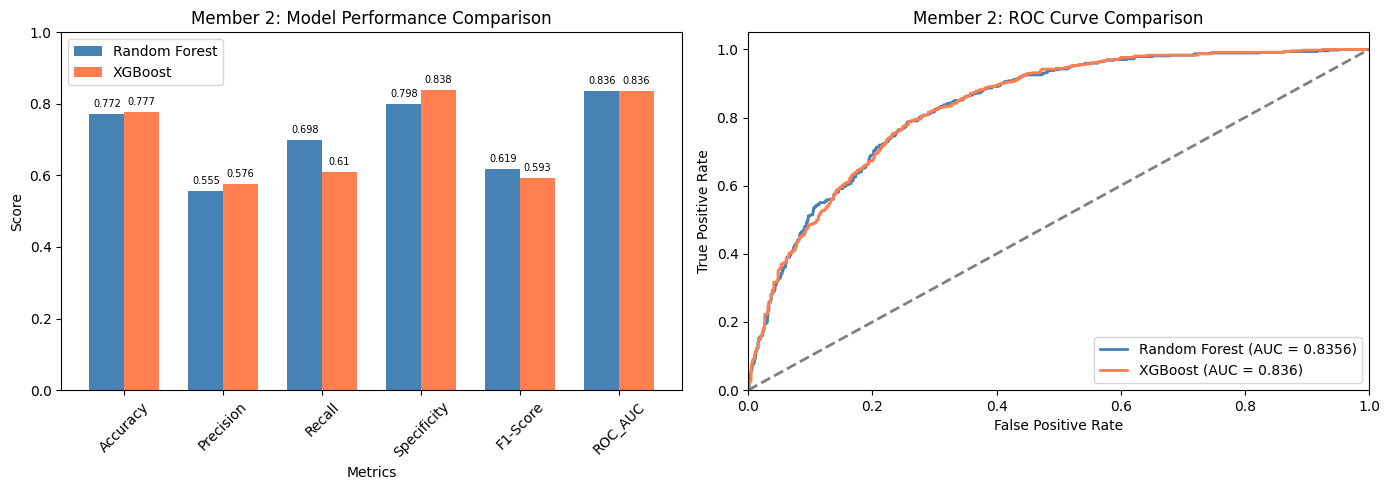

In [ ]:
print("MEMBER 2: MODEL COMPARISON")

# Create comparison dataframe
comparison_df_m2 = pd.DataFrame(member2_results).T
print("\nModel Performance Comparison:")
print(comparison_df_m2)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot comparison
metrics_m2 = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'ROC_AUC']
x = np.arange(len(metrics_m2))
width = 0.35

rf_scores = [member2_results['Random Forest'][m] for m in metrics_m2]
xgb_scores = [member2_results['XGBoost'][m] for m in metrics_m2]

axes[0].bar(x - width/2, rf_scores, width, label='Random Forest', color='steelblue')
axes[0].bar(x + width/2, xgb_scores, width, label='XGBoost', color='coral')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Member 2: Model Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_m2, rotation=45)
axes[0].legend()
axes[0].set_ylim(0, 1)

# Add value labels
for i, (rf_val, xgb_val) in enumerate(zip(rf_scores, xgb_scores)):
    axes[0].text(i - width/2, rf_val + 0.02, str(round(rf_val, 3)), ha='center', fontsize=7)
    axes[0].text(i + width/2, xgb_val + 0.02, str(round(xgb_val, 3)), ha='center', fontsize=7)

# Combined ROC Curve
axes[1].plot(fpr_rf, tpr_rf, color='steelblue', lw=2,
             label='Random Forest (AUC = ' + str(round(member2_results['Random Forest']['ROC_AUC'], 4)) + ')')
axes[1].plot(fpr_xgb, tpr_xgb, color='coral', lw=2,
             label='XGBoost (AUC = ' + str(round(member2_results['XGBoost']['ROC_AUC'], 4)) + ')')
axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Member 2: ROC Curve Comparison')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.savefig('project_images/member2_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Save results to CSV
comparison_df_m2.to_csv('project_images/member2_results.csv')

GROUP ANALYSIS - CONSOLIDATED RESULTS

In [ ]:
# Combine all results
all_results = {
    'Member 1 - Naive Bayes (Reviews)': member1_results['Naive Bayes'],
    'Member 1 - SVM (Reviews)': member1_results['SVM'],
    'Member 2 - Random Forest (Churn)': member2_results['Random Forest'],
    'Member 2 - XGBoost (Churn)': member2_results['XGBoost'],
}

# Create consolidated dataframe
all_results_df = pd.DataFrame(all_results).T

print("\nCONSOLIDATED PERFORMANCE METRICS:")
print(all_results_df)

# Save to CSV
all_results_df.to_csv('project_images/group_results_summary.csv')
print("\nResults saved to 'group_results_summary.csv'")


CONSOLIDATED PERFORMANCE METRICS:
                                  Accuracy  Precision    Recall  F1-Score  \
Member 1 - Naive Bayes (Reviews)  0.812960   0.750808  0.812960  0.753952   
Member 1 - SVM (Reviews)          0.845600   0.817361  0.845600  0.824156   
Member 2 - Random Forest (Churn)  0.771721   0.555366  0.698073  0.618596   
Member 2 - XGBoost (Churn)        0.777399   0.575758  0.610278  0.592516   

                                  Cohen_Kappa  Specificity   ROC_AUC  
Member 1 - Naive Bayes (Reviews)     0.240271          NaN       NaN  
Member 1 - SVM (Reviews)             0.510589          NaN       NaN  
Member 2 - Random Forest (Churn)     0.458707     0.798300  0.835570  
Member 2 - XGBoost (Churn)           0.439569     0.837713  0.835989  

Results saved to 'group_results_summary.csv'


GROUP VISUALIZATION - COMPREHENSIVE COMPARISON

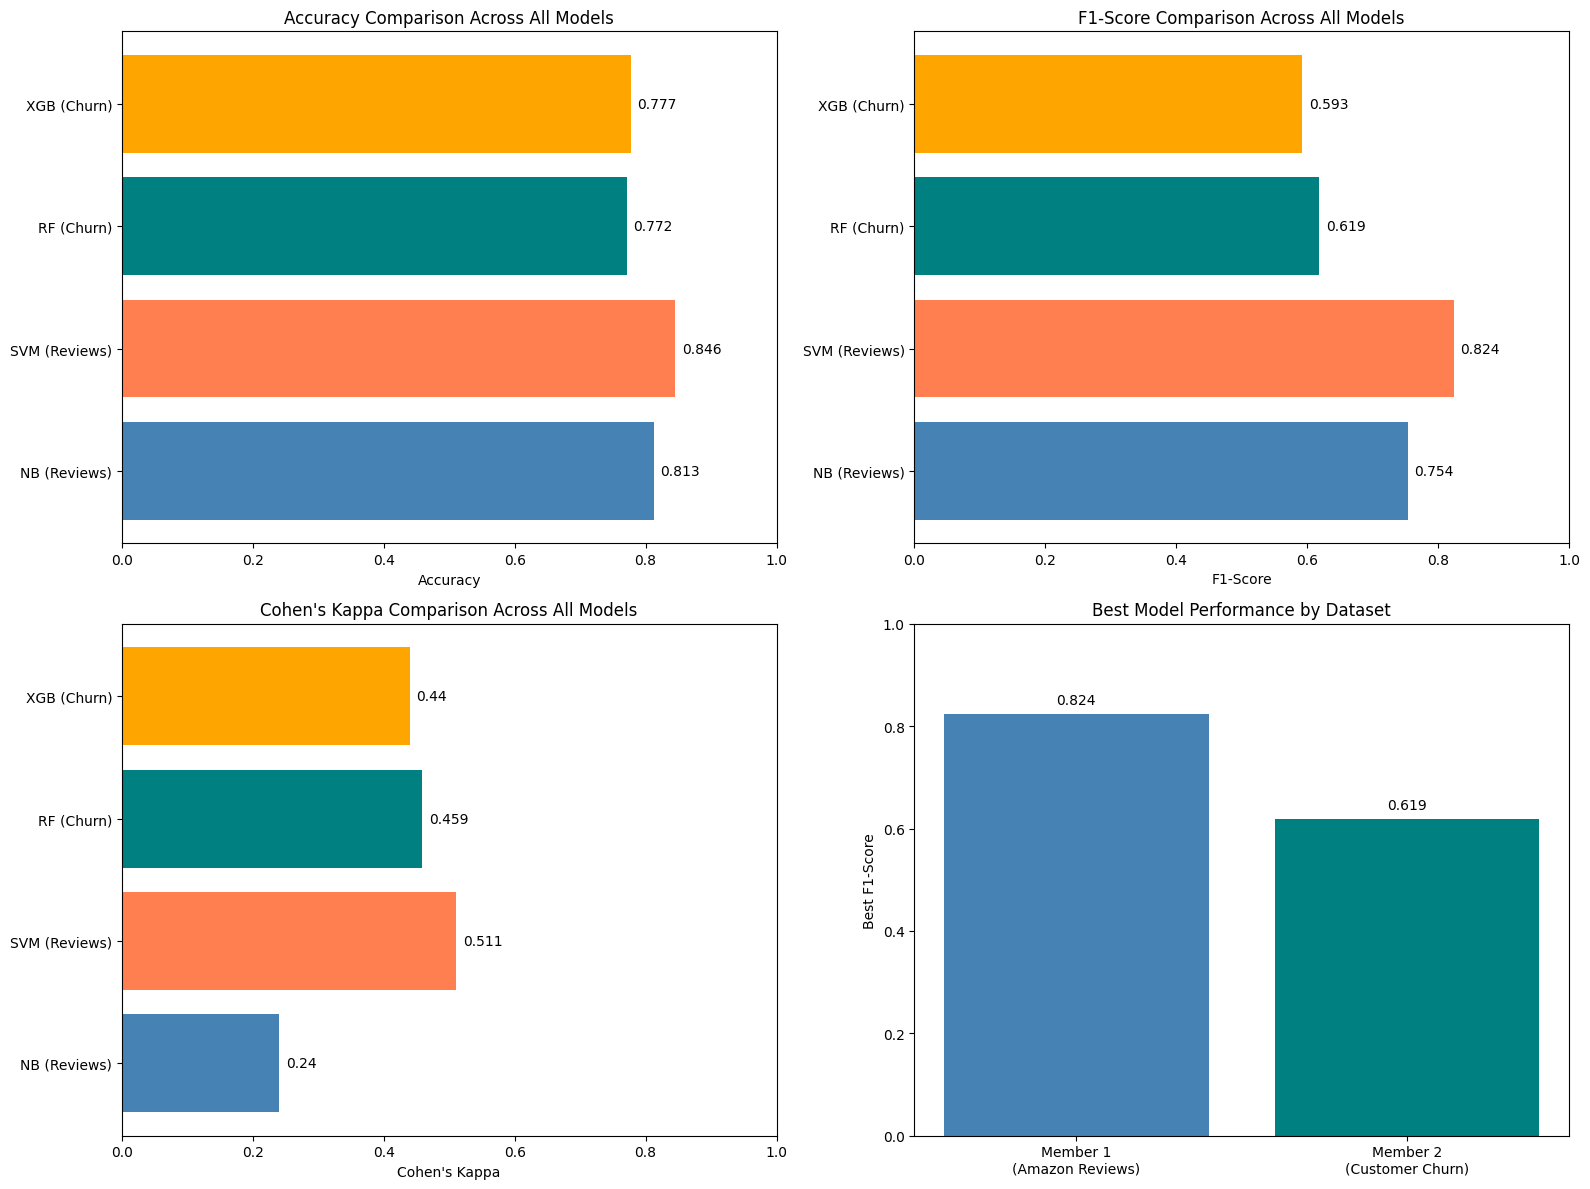

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison (All Models)
models = list(all_results.keys())
model_short_names = ['NB (Reviews)', 'SVM (Reviews)', 'RF (Churn)', 'XGB (Churn)']
accuracies = [all_results[m].get('Accuracy', 0) for m in models]
colors = ['steelblue', 'coral', 'teal', 'orange']

bars1 = axes[0, 0].barh(model_short_names, accuracies, color=colors)
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Accuracy Comparison Across All Models')
axes[0, 0].set_xlim(0, 1)
for i, v in enumerate(accuracies):
    axes[0, 0].text(v + 0.01, i, str(round(v, 3)), va='center')

# 2. F1-Score Comparison
f1_scores = [all_results[m].get('F1-Score', 0) for m in models]

bars2 = axes[0, 1].barh(model_short_names, f1_scores, color=colors)
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('F1-Score Comparison Across All Models')
axes[0, 1].set_xlim(0, 1)
for i, v in enumerate(f1_scores):
    axes[0, 1].text(v + 0.01, i, str(round(v, 3)), va='center')

# 3. Cohen's Kappa Comparison
kappa_scores = [all_results[m].get('Cohen_Kappa', 0) for m in models]

bars3 = axes[1, 0].barh(model_short_names, kappa_scores, color=colors)
axes[1, 0].set_xlabel("Cohen's Kappa")
axes[1, 0].set_title("Cohen's Kappa Comparison Across All Models")
axes[1, 0].set_xlim(0, 1)
for i, v in enumerate(kappa_scores):
    axes[1, 0].text(v + 0.01, i, str(round(v, 3)), va='center')

# 4. Best Model Performance by Dataset
member_best = {
    'Member 1\n(Amazon Reviews)': max(member1_results['Naive Bayes']['F1-Score'],
                                       member1_results['SVM']['F1-Score']),
    'Member 2\n(Customer Churn)': max(member2_results['Random Forest']['F1-Score'],
                                       member2_results['XGBoost']['F1-Score'])
}

bars4 = axes[1, 1].bar(member_best.keys(), member_best.values(), color=['steelblue', 'teal'])
axes[1, 1].set_ylabel('Best F1-Score')
axes[1, 1].set_title('Best Model Performance by Dataset')
axes[1, 1].set_ylim(0, 1)
for i, (k, v) in enumerate(member_best.items()):
    axes[1, 1].text(i, v + 0.02, str(round(v, 3)), ha='center')

plt.tight_layout()
plt.savefig('project_images/group_comprehensive_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
print("\n" + "=" * 60)
print("CREATING ZIP FILE WITH ALL PROJECT FILES")
print("=" * 60)

import zipfile
from google.colab import files

# Create ZIP file
zip_filename = 'ECommerce_Project_All_Results.zip'

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add all files from project_images folder
    for root, dirs, files_list in os.walk('project_images'):
        for file in files_list:
            file_path = os.path.join(root, file)
            arcname = file
            zipf.write(file_path, arcname)
            print("Added:", file)

print("\n" + "-" * 40)
print("ZIP file created:", zip_filename)
print("-" * 40)

# List contents of ZIP
print("\nZIP file contents:")
with zipfile.ZipFile(zip_filename, 'r') as zipf:
    for name in zipf.namelist():
        print(" -", name)

# Download the ZIP file
print("\n" + "=" * 60)
print("DOWNLOADING ZIP FILE...")
print("=" * 60)

files.download(zip_filename)

print("\n" + "=" * 60)
print("PROJECT COMPLETE!")
print("=" * 60)

print("""
FILES INCLUDED IN ZIP:

MEMBER 1 (Amazon Product Reviews - Text Analytics):
  - member1_eda.png
  - member1_nb_confusion_matrix.png
  - member1_svm_confusion_matrix.png
  - member1_lime_features.png
  - member1_model_comparison.png
  - member1_results.csv

MEMBER 2 (E-Commerce Customer Churn):
  - member2_eda.png
  - member2_rf_results.png
  - member2_xgb_results.png
  - member2_shap_summary.png
  - member2_shap_bar.png
  - member2_model_comparison.png
  - member2_results.csv

GROUP ANALYSIS:
  - group_comprehensive_comparison.png
  - group_results_summary.csv
  - publication_summary_table.csv

Total: 15+ files ready for your IEEE report!
""")


CREATING ZIP FILE WITH ALL PROJECT FILES
Added: group_comprehensive_comparison.png
Added: member1_lime_explanation.html
Added: member1_eda.png
Added: member1_nb_confusion_matrix.png
Added: member2_rf_results.png
Added: member2_model_comparison.png
Added: member1_svm_confusion_matrix.png
Added: member2_eda.png
Added: member1_model_comparison.png
Added: member2_results.csv
Added: member2_xgb_results.png
Added: member1_results.csv
Added: member2_shap_summary.png
Added: group_results_summary.csv
Added: member1_lime_features.png
Added: member2_shap_bar.png

----------------------------------------
ZIP file created: ECommerce_Project_All_Results.zip
----------------------------------------

ZIP file contents:
 - group_comprehensive_comparison.png
 - member1_lime_explanation.html
 - member1_eda.png
 - member1_nb_confusion_matrix.png
 - member2_rf_results.png
 - member2_model_comparison.png
 - member1_svm_confusion_matrix.png
 - member2_eda.png
 - member1_model_comparison.png
 - member2_resul

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


PROJECT COMPLETE!

FILES INCLUDED IN ZIP:

MEMBER 1 (Amazon Product Reviews - Text Analytics):
  - member1_eda.png
  - member1_nb_confusion_matrix.png
  - member1_svm_confusion_matrix.png
  - member1_lime_features.png
  - member1_model_comparison.png
  - member1_results.csv

MEMBER 2 (E-Commerce Customer Churn):
  - member2_eda.png
  - member2_rf_results.png
  - member2_xgb_results.png
  - member2_shap_summary.png
  - member2_shap_bar.png
  - member2_model_comparison.png
  - member2_results.csv

GROUP ANALYSIS:
  - group_comprehensive_comparison.png
  - group_results_summary.csv
  - publication_summary_table.csv

Total: 15+ files ready for your IEEE report!

